# Analysis of the training sessions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import style

style.use("fivethirtyeight")

In [2]:
RESULT_CSV = "./result/result.csv"

NUMBER_OF_TRAINING_SESSIONS = 50

FONT_SIZE = 20

## Group the results

In [3]:
results = pd.read_csv(RESULT_CSV)

average_validation_accuracy = (results
     .groupby(["Training-Test-Split", "Aktivierungsfunktion"])
     .aggregate("validation accuracy")
     .sum()
     .div(NUMBER_OF_TRAINING_SESSIONS))

average_test_accuracy = (results
     .groupby(["Training-Test-Split", "Aktivierungsfunktion"])
     .aggregate("test accuracy")
     .sum()
     .div(NUMBER_OF_TRAINING_SESSIONS))

average_training_time = (results
     .groupby(["Training-Test-Split", "Aktivierungsfunktion"])
     .aggregate("Trainingszeit")
     .sum()
     .div(NUMBER_OF_TRAINING_SESSIONS))

standard_deviation = (results
     .groupby(["Training-Test-Split", "Aktivierungsfunktion"])
     .std())

## Validation accuracy per training configuration

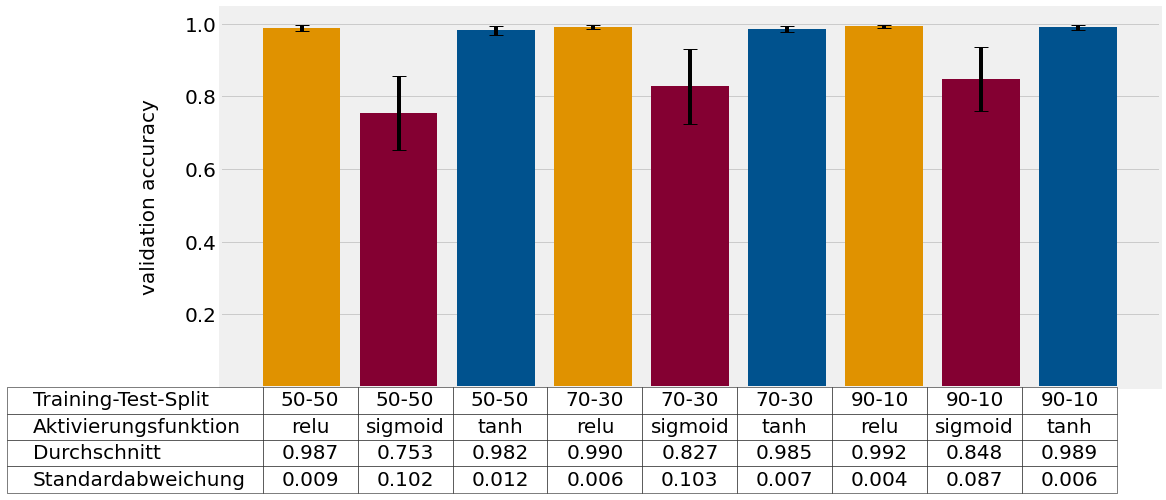

In [4]:
fig, ax = plt.subplots(figsize=(15, 7))

std_validation_accuracy = standard_deviation["validation accuracy"]

x_labels = []
y_ticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
y_labels = [""] + [str(y) for y in y_ticks[1:]] 

plt.xticks(np.arange(len(standard_deviation)), fontsize=FONT_SIZE, labels=x_labels)
plt.yticks(fontsize=FONT_SIZE, ticks=y_ticks, labels=y_labels)

ax.bar(
    x=np.arange(len(std_validation_accuracy)) - 1,
    width=0.8,
    height=average_validation_accuracy,
    yerr=std_validation_accuracy,    
    capsize=7,
    color=["#E09200", "#840032", "#00528E"]
)

plt.grid(axis="x")

plt.ylabel("validation accuracy\n", fontsize=FONT_SIZE)

training_test_split_names = [str(index[0]) for index in  std_validation_accuracy.index.values]
activation_functions = [str(index[1]) for index in std_validation_accuracy.index.values]
averages = [f"{a:1.3f}" for a in average_validation_accuracy]
standard_deviations = [f"{s:1.3f}" for s in std_validation_accuracy]

table = ax.table(
    cellText=[training_test_split_names, activation_functions, averages, standard_deviations],
    rowLabels=["Training-Test-Split", "Aktivierungsfunktion", "Durchschnitt", "Standardabweichung"],
    colWidths=[0.101] * 9,
    loc="bottom",
    colLoc="center",
    cellLoc="center",
)

table.auto_set_font_size(False)
table.set_fontsize(FONT_SIZE)
table.scale(1, 2.2)
table.set_zorder(10)

plt.show()

## Test accuracy per training configuration

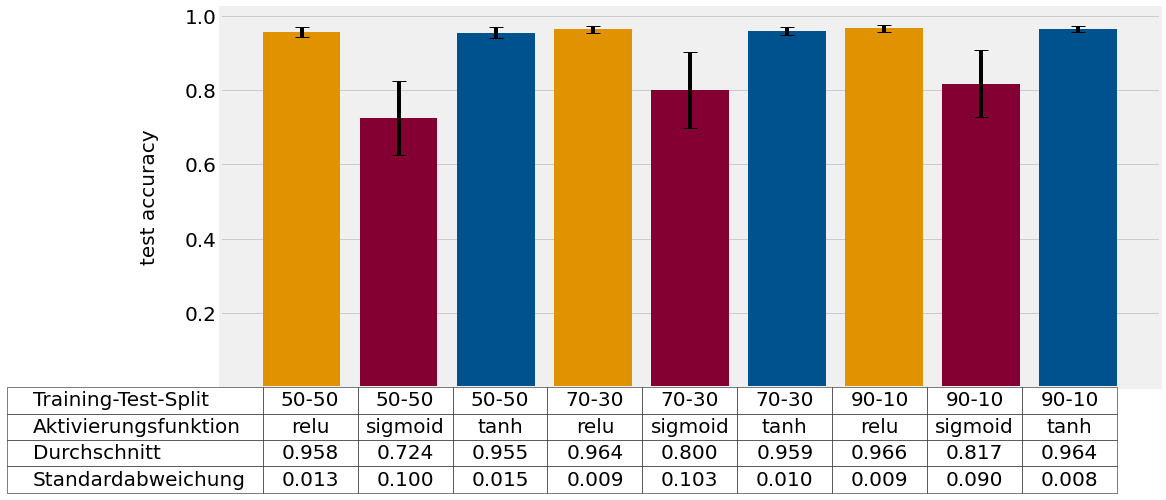

In [5]:
fig, ax = plt.subplots(figsize=(15, 7))

std_test_accuracy = standard_deviation["test accuracy"]

x_labels = []
y_ticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
y_labels = [""] + [str(y) for y in y_ticks[1:]] 

plt.xticks(np.arange(len(standard_deviation)), fontsize=FONT_SIZE, labels=x_labels)
plt.yticks(fontsize=FONT_SIZE, ticks=y_ticks, labels=y_labels)

ax.bar(
    x=np.arange(len(std_test_accuracy)) - 1,
    width=0.8,
    height=average_test_accuracy,
    yerr=std_test_accuracy,    
    capsize=7,
    color=["#E09200", "#840032", "#00528E"]
)

plt.grid(axis="x")

plt.ylabel("test accuracy\n", fontsize=FONT_SIZE)

training_test_split_names = [str(index[0]) for index in  std_test_accuracy.index.values]
activation_functions = [str(index[1]) for index in std_test_accuracy.index.values]
averages = [f"{a:1.3f}" for a in average_test_accuracy]
standard_deviations = [f"{s:1.3f}" for s in std_test_accuracy]

table = ax.table(
    cellText=[training_test_split_names, activation_functions, averages, standard_deviations],
    rowLabels=["Training-Test-Split", "Aktivierungsfunktion", "Durchschnitt", "Standardabweichung"],
    colWidths=[0.101] * 9,
    loc="bottom",
    colLoc="center",
    cellLoc="center",
)

table.auto_set_font_size(False)
table.set_fontsize(FONT_SIZE)
table.scale(1, 2.2)
table.set_zorder(10)

plt.show()

## Training time per training configuration

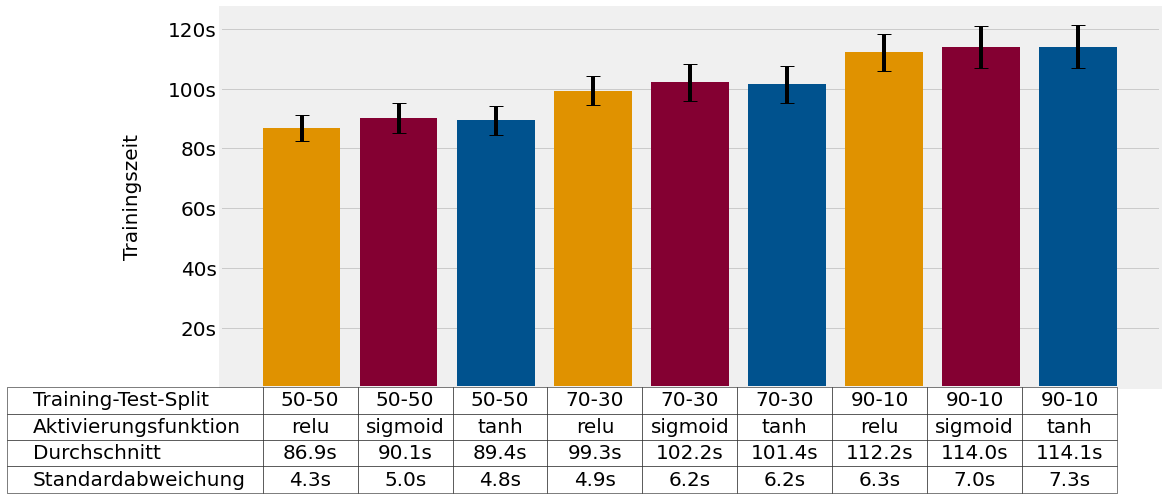

In [6]:
fig, ax = plt.subplots(figsize=(15, 7))

std_training_time = standard_deviation["Trainingszeit"]

x_labels = []
y_labels = [""] + [f"{y}s" for y in range(20, 121, 20)]

plt.xticks(np.arange(len(standard_deviation)), fontsize=FONT_SIZE, labels=x_labels)
plt.yticks(fontsize=FONT_SIZE, ticks=list(range(0, 121, 20)), labels=y_labels)

ax.bar(
    x=np.arange(len(std_training_time)) - 1,
    width=0.8,
    height=average_training_time,
    yerr=std_training_time,    
    capsize=7,
    color=["#E09200", "#840032", "#00528E"]
)

plt.grid(axis="x")

plt.ylabel("Trainingszeit\n", fontsize=FONT_SIZE)

training_test_split_names = [str(index[0]) for index in  std_training_time.index.values]
activation_functions = [str(index[1]) for index in std_training_time.index.values]
averages = [f"{a:3.1f}s" for a in average_training_time]
standard_deviations = [f"{s:3.1f}s" for s in std_training_time]

table = ax.table(
    cellText=[training_test_split_names, activation_functions, averages, standard_deviations],
    rowLabels=["Training-Test-Split", "Aktivierungsfunktion", "Durchschnitt", "Standardabweichung"],
    colWidths=[0.101] * 9,
    loc="bottom",
    colLoc="center",
    cellLoc="center",
)

table.auto_set_font_size(False)
table.set_fontsize(FONT_SIZE)
table.scale(1, 2.2)
table.set_zorder(10)

plt.show()

## Test accuracy per training session, color-coded by activation function

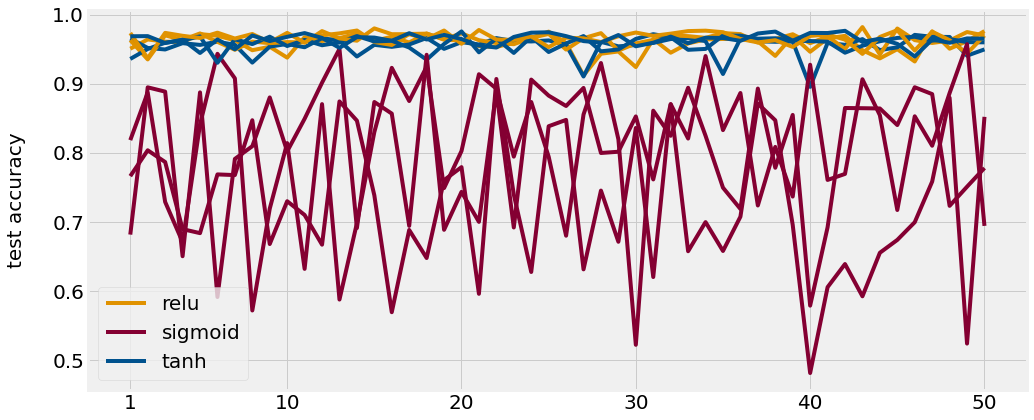

In [7]:
test_accuracy_per_config = (results
    .groupby(["Training-Test-Split", "Aktivierungsfunktion", "Trainingsdurchgang"])
    .aggregate("test accuracy")
    .sum())

plt.figure(figsize=(15, 7))

colors = ["#E09200", "#840032", "#00528E", "#E09200", "#840032", "#00528E", "#E09200", "#840032", "#00528E"]

training_test_split_names = [str(index[0]) for index in  average_test_accuracy.index.values]
activation_functions = [str(index[1]) for index in average_test_accuracy.index.values]

plt.xticks([1] + list(range(10, 51, 10)), fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.ylabel("test accuracy\n", fontsize=FONT_SIZE)

for config_number in range(0, 9):
    plt.plot(list(range(1, 51)), test_accuracy_per_config[config_number * 50:config_number * 50 + 50], color=colors[config_number])

plt.legend(activation_functions[:3], loc="lower left", prop={"size": FONT_SIZE})

plt.show()

## Training time per training session, color-coded by activation function

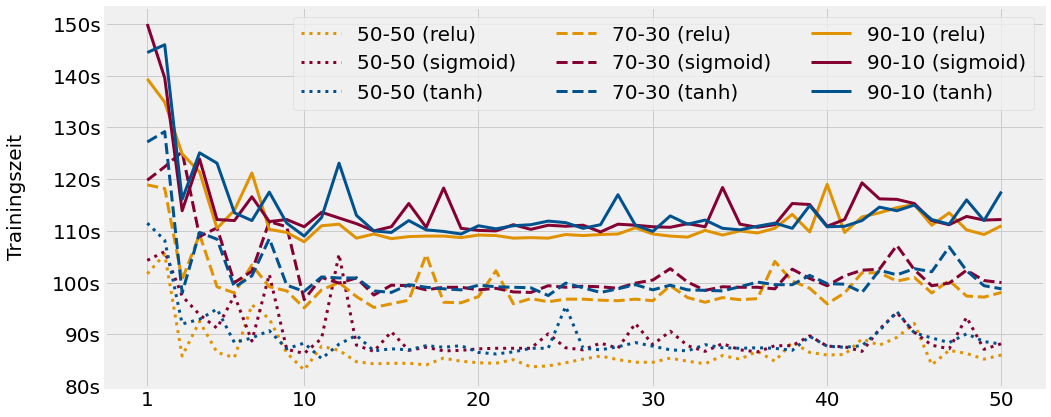

In [8]:
training_time_per_config = (results
    .groupby(["Training-Test-Split", "Aktivierungsfunktion", "Trainingsdurchgang"])
    .aggregate("Trainingszeit")
    .sum())

plt.figure(figsize=(15, 7))

colors = ["#E09200", "#840032", "#00528E", "#E09200", "#840032", "#00528E", "#E09200", "#840032", "#00528E"]
line_styles = ["dotted", "dotted", "dotted", "dashed", "dashed", "dashed", "solid", "solid", "solid"]

legend_text = [f"{index[0]} ({index[1]})" for index in average_training_time.index.values]

plt.xticks([1] + list(range(10, 51, 10)), fontsize=FONT_SIZE)
plt.yticks(ticks=range(80, 151, 10), labels=[f"{y}s" for y in range(80, 151, 10)], fontsize=FONT_SIZE)
plt.ylabel("Trainingszeit\n", fontsize=FONT_SIZE)

for config_number in range(0, 9):
    plt.plot(
        list(range(1, 51)),
        training_time_per_config[config_number * 50:config_number * 50 + 50],
        color=colors[config_number],
        linewidth=3.0,  
        linestyle=line_styles[config_number]
    )

plt.legend(legend_text, loc="upper right", prop={"size": FONT_SIZE}, ncol=3)

plt.show()